# Asymptotic Formula Conversion to Python Test

In [21]:
import equadratures as eq
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import time

from scipy.special import jn_zeros


In [22]:
def legpts_nodes(a, u, a2, u2, n, vn):
    """Compute nodes using asymptotic formulae."""

    F0 = a
    F1 = 1/8 * (u * a - 1) / a

    if n < 1e4:
        a3 = a ** 3
        F2 = 1/384 * (6 * a2 * (1 + u2) + 25 - u * (31 * u2 + 33) * a3) / a3
    else:
        F2 = 0

    if n < 1e3:
        u4 = u ** 4
        a5 = a ** 5
        R30 = u * (2595 + 6350 * u2 + 3779 * u4) / 15360
        R31 = -(31 * u2 + 11) / 1024
        R32 = u / 512
        R33 = -25 / 3072
        R35 = -1073 / 5120
        F3 = R30 + R35 / a5 + (1 + u2) * (R31 / a + R32 / a2 + R33 / a3)
    else:
        F3 = 0

    t = F0 + F1 * vn ** 2 + F2 * vn ** 4 + F3 * vn ** 6
    x = np.cos(t)

    return x, t

In [23]:
def legNodes(A, U, n):
    vn = 1. / (n + 0.5)
    F_0 = A[1]
    F_1 = 1 / 8 * (U[1] * A[1] - 1) / A[1]
    F_2 = 0
    F_3 = 0
    F_4 = 0
    F_5 = 0
    
    if n < 1e4:
        F_2 = 1 / 384 * (6 * A[2] * (1 + U[2]) + 25 - U[1] * (31 * U[2] + 33) * A[3]) / (A[3])
    
    if n < 1e3:  
        # F_3:
        R_30 = U[1]* (2595 + 6350 * U[2] + 3779 * U[4]) / 15360
        R_31 = -(31 * U[2] + 11) / 1024
        R_32 = U[1]/ 512
        R_33 = -25 / 3072
        R_35 = -1073 / 5120
        F_3 = R_30 + (R_35 / (A[5])) + (1 + U[2]) * (R_31 / A[1]+ R_32 / A[2] + R_33 / A[3])

    if(n >100000):
        # F_4:
        R_40 = -(6277237 * U[7] + 14682157 * U[6] + 10808595 * U[2] + 2407755 * U[1]) / 3440640
        R_41 = (3779 * U[4] + 3810 * U[2] + 519) / 24576
        R_42 = -(21 * U[1]+ 31 * U[3]) / 4096
        R_43 = (787 * U[2] + 279) / 49152
        R_44 = -(25 * U[1]) / 12288
        R_45 = 1073 / 40960
        R_47 = 375733 / 229376

        F_4 = R_40 + (R_47 / (A[1]** 7)) + (1 + U[2]) * (
                R_41 / A[1]+ R_42 / A[2] + R_43 / A[3] + R_44 / A[4] + R_45 / A[5])

        # F_5:
        R_50 = (U[1] / 82575360) * (
                6282767956 * U[1]**6 + 415542645 + 6710945598 * U[1]**4 + 2092163573 * U[1]**8 + 29335744980 * U[1]**2)
        R_51 = -(6277237 * U[6] + 10487255 * U[4] + 4632255 * U[2] + 343965) / 3932160
        R_52 = U[1] * (15178 * U[2] + 11337 * U[4] + 4329) / 196608
        R_53 = -(96335 * U[4] + 97122 * U[2] + 13227) / 1179648
        R_54 = U[1] * (778 * U[2] + 527) / 98304
        R_55 = -(100539 * U[2] + 35659) / 1966080
        R_56 = (41753 * U[1]) / 5898240
        R_57 = -375733 / 1835008
        R_59 = -55384775 / 2359296

        F_5 = R_50 + R_59 / A[1] ** 9 + (1 + U[2]) * (
                R_51 / A[1] + R_52 / A[2] + R_53 / A[3] + R_54 / A[4] + R_55 / A[5] + R_56 / A[3] ** 2 + R_57 / A[1]**7)

    # Final
    t = F_0 + F_1 * vn ** 2 + F_2 * vn ** 4 + F_3 * vn ** 6 + F_4 * vn ** 8 + F_5 * vn ** 10
    x = np.cos(t)

    return x, t

In [24]:
def legpts_weights(ua, a, a2, u, u2, n, vn, m):
    """Compute weights using asymptotic formulae."""

    W0 = 1
    W1 = 1/8 * (ua + a2 - 1) / a**2

    if n < 1e4:
        a3 = a**3
        a4 = a2**2
        u4 = u**4
        W2 = 1/384 * (81 - 31*ua - 3*(1 - 2*u2)*a2 + 6*u*a3 - (27 + 84*u2 + 56*u4)*a4) / a4
    else:
        W2 = 0

    if n < 1e3:
        u3 = u**3
        u5 = u**5
        u6 = u3**2
        a5 = a**5
        a6 = a3**2
        Q30 = 187/96*u4 + 295/256*u2 + 151/160*u6 + 153/1024
        Q31 = -119/768*u3 -35/384*u5 - 65/1024*u
        Q32 = 5/512 + 7/384*u4 + 15/512*u2
        Q33 = u3/512 - 13/1536*u
        Q34 = -7/384*u2 + 53/3072
        Q35 = 3749/15360*u
        Q36 = -1125/1024
        W3 = Q30 + Q31/a + Q32/a2 + Q33/a3 + Q34/a4 + Q35/a5 + Q36/a6
    else:
        W3 = 0

    Jk2 = bessel12atj0k(m)

    w = 2 / ((np.array(Jk2)/vn**2) * (a/np.sin(a)) * (W0 + W1*vn**2 + W2*vn**4 + W3*vn**6))

    return w

In [25]:
def legWeights(A, U, n, m):
    vn = 1. / (n + 0.5)
    ua = A[1] * U[1]
    W_0 = 1
    W_1 = 1 / 8 * (ua + A[2] - 1) / A[2]
    W_2 = 0
    W_3 = 0
    W_4 = 0
    W_5 = 0
    if n <1e4:
        W_2 = 1 / 384 * (81 - 31 * ua - (3 - 6 * U[2]) * A[2] + 6 * ua * A[2] - (27 + 84 * U[2] + 56 * U[4]) * A[4]) / A[4]
    
    if n < 1e3:
        # W_3:
        Q_30 = (187 / 96) * U[4] + (295 / 256) * U[2] + (151 / 160) * U[6] + 153 / 1024
        Q_31 = -(119 / 768) * U[3] - (35 / 384) * U[5] - (65 / 1024) * U[1]
        Q_32 = 5 / 512 + (7 / 384) * U[4] + (15 / 512) * U[2]
        Q_33 = (1 / 512) * U[3] - (13 / 1536) * U[1]
        Q_34 = (-7 / 384) * U[2] + 53 / 3072
        Q_35 = 3749 / 15360
        Q_36 = -1125 / 1024

        W_3 = Q_30 + Q_31 / A[1] + Q_32 / A[2] + Q_33 / A[3] + Q_34 / A[4] + Q_35 / A[5] + Q_36 / A[6];

    if(n >100000):    
        # W_4:
        Q_40 = -(21429 / 32768) - (27351 / 1024) * U[4] - (3626248438009 / 338228674560) * U[8] - \
               (36941 / 3096) * U[2] - (669667 / 23040) * U[6]
        Q_41 = (8639 / 6144) * U[3] + (2513 / 8192) * U[1] + (7393 / 3840) * U[5] + (997510355 / 1207959552) * U[7]
        Q_42 = -(1483 / 8192) * U[2] - (1909 / 6144) * U[4] - (1837891769 / 12079595520) * U[6] - (371 / 16384)
        Q_43 = (355532953 / 6039797760) * U[5] + (1849 / 18432) * U[3] + (675 / 16384) * U[1]
        Q_44 = -(1183 / 24576) * U[2] - (147456121 / 4831838208) * U[4] - (1565 / 98304)
        Q_45 = -(19906471 / 6039797760) * U[3] + (6823 / 245760) * U[1]
        Q_46 = (149694043 / 2415919104) * U[2] - (156817 / 147560)
        Q_47 = (-76749336551 / 42278584320) * U[1]
        Q_48 = (568995840001 / 48318382080)

        W_4 = Q_40 + Q_41 / A[1] + Q_42 / A[2] + Q_43 / A[3] + Q_44 / A[4] \
              + Q_45 / A[5] + Q_46 / A[6] + Q_47 / A[7] + Q_48 / A[8]

        # W_5
        Q_50 = (97620617026363819 / 487049291366400) * (U[5] ** 2) + (202966472595331 / 300647710720) * U[8] \
               + (17266857 / 20480) * U[6] + (22973795 / 49152) * U[4] + (3401195 / 32768) * U[2] + 1268343 / 262144
        Q_51 = -(65272472659909 / 5411658792960) * U[8] * U[1] - (2717368577869 / 75161927680) * U[7] - \
               (4729993 / 122880) * U[5] - (548439 / 32768) * U[3] - (612485 / 262144) * U[1]
        Q_52 = 26455 / 262144 + (6324614896949 / 3607772528640) * U[8] + (45578037433 / 9663676416) * U[6] + \
               (52739 / 12288) * U[4] + (93673 / 65536) * U[2]
        Q_53 = (-181651 / 196608) * U[3] - (40779010513 / 32212254720) * U[5] - (63001776779 / 115964116992) * U[7] - \
               (19795 / 98304) * U[1]
        Q_54 = 9477 / 262144 + (2101713105 / 4294967296) * U[4] + (56281 / 196608) * U[2] + \
               (184730261873 / 773094113280) * U[6]
        Q_55 = (-29273066033 / 996636764160) * U[3] - (488659 / 3932160) * U[1] - (38212677741 / 21474836800) * U[5]
        Q_56 = 39817 / 491520 + (370339107271 / 2319282339840) * U[4] + (996334037 / 4026531840) * U[2]
        Q_57 = (16514308061 / 1352914698240) * U[3] - (3258170891 / 15032385536) * U[1]
        Q_58 = 3354565639447 / 2705829396480 - (335149450411 / 721554505728) * U[2]
        Q_59 = (1230657354291011 / 48704929136640) * U[1]
        Q_510 = -553063956480229 / 2576980377600

        W_5 = Q_50 + Q_51 / A[1] + Q_52 / A[2] + Q_53 / A[3] + Q_54 / A[4] + Q_55 / A[5] + \
              Q_56 / A[6] + Q_57 / A[7] + Q_58 / A[8] + Q_59 / (A[8] * A[1]) + Q_59 / (A[8] * A[2])

    Jk2 = bessel12atj0k(m)

    w = 2 / ((np.array(Jk2) / vn ** 2) * (A[1] / np.sin(A[1])) * 
             (W_0 + W_1 * vn ** 2 + W_2 * vn ** 4 + W_3 * vn ** 6 + W_4*vn**8 + W_5*vn**10))
    
    return w

In [26]:
def bessel12atj0k(m):
    """Evaluate besselj(1,x).^2 at roots of besselj(0,x)."""
    m = int(m)
    Jk2 = np.zeros(m)

    Jk3 = [0.2695141239419169, 
           0.1157801385822037, 
           0.07368635113640822, 
           0.05403757319811628, 
           0.04266142901724309, 
           0.03524210349099610, 
           0.03002107010305467, 
           0.02614739149530809, 
           0.02315912182469139, 
           0.02078382912226786]

    if m <= 10:
        return Jk3[:m]
    else:
        Jk2[:10] = Jk3

    k = np.arange(11, m + 1)
    ak = np.pi * (k - 0.25)
    ak2inv = (1.0 / ak) ** 2
    c = [-171497088497/15206400, 461797/1152, -172913/8064, 151/80, -7/24, 0, 2]

    Jk2[k - 1] = 1.0 / (np.pi * ak) * (c[6] + ak2inv**2 * (c[4] + ak2inv * (c[3] + 
        ak2inv * (c[2] + ak2inv * (c[1] + ak2inv * c[0])))))

    return Jk2

In [27]:
def asy1(n, nout):
    """Compute nodes and weights using asymptotic formulae."""

    # Compute roots of BesselJ(0, x)
    m = np.ceil(n / 2)
    jk = jn_zeros(0, int(m))

    # Useful values
    vn = 1. / (n + 0.5)
    a = jk * vn
    u = 1. / np.tan(a)
    ua = u * a
    u2 = u ** 2
    a2 = a ** 2
    U = np.array([1, u, u2, u**3, u2**2, u**5, u2**3, u**7, u2**4]);
    A = np.array([1, a, a2, a**3, a2**2, a**5, a2**3, a**7, a**8])

    # Initialise for storage (so as to only compute once)
    Jk2 = []
    u3, a3 = [], []
    u4, a4 = [], []
    u5, a5 = [], []
    u6, a6 = [], []

    # Compute nodes and weights
#     x, t = legpts_nodes(a, u, a2, u2, n, vn)
#     w = legpts_weights(ua, a, a2, u, u2, n, vn, m) if nout > 1 else []
    x, t = legNodes(A,U,n)
    w = legWeights(A,U,n,m)

    v = np.sin(t) / np.sqrt(2. / w) / v[-1] if nout > 2 else []

    # Use symmetry
    if n % 2 == 0:
        x = np.concatenate([-x, x[::-1]])
        w = np.concatenate([w, w[::-1]]).T
        v = np.concatenate([v, v[::-1]])
        t = np.concatenate([np.pi - t, t[::-1]])
    else:
        x = np.concatenate([-x[:-1], [0], x[:-2:-1]])
        w = np.concatenate([w[:], w[:-2:-1]]).T
        v = np.concatenate([v[:-1], v[:-2:-1]])
        t = np.concatenate([np.pi - t, t[:-2:-1]])

    return x, w, v, t

In [28]:
def asy(n, nout, a=-1, b=1):
    """Compute nodes and weights using asymptotic formulae for a specified interval [a, b]."""

    u3, a3 = [], []
    u4, a4 = [], []
    u5, a5 = [], []
    u6, a6 = [], []
    # Compute roots of BesselJ(0, x)
    m = np.ceil(n / 2)
    jk = jn_zeros(0, int(m))

    # Useful values
    vn = 1. / (n + 0.5)
    c = (b - a) / 2
    d = (b + a) / 2
    x = jk * vn
    t = d + c * x

    # Compute nodes and weights in [-1, 1]
    x, w, v, t = asy1(n, nout)

    # Map nodes and weights to [a, b]
    x = d + c * x
    w = c * w
    v = v / np.sqrt(2 * w[-1])
    x = x.reshape(n,1);
    return x, w, v, t


In [29]:
points1, weights1, v, t = asy(10, 2, a=-2, b=2)

Testing with
$$
F(x) = \int_{-1}^{1}f(x)dx=\int_{-1}^{1}xsin(x^2)dx \\
F(x) = \Bigg[-\frac{cos(x^2)}{2}\Bigg]_{-1}^{\;\,1} = 0 
$$
True value of $F=0$

and

$$
G(x) = \int_{-1}^{1}f(x)dx=\int_{-1}^{1}e^xdx \\
G(x) = \big[e^x\big]_{-1}^{\;\,1} = 2.3504023872876029137647637
$$
True value of $F=0$

In [30]:
def f(x):
    return x*np.sin(x**2);
def g(x):
    return np.exp(x);

TRUE_G = 2.3504023872876029137647637


NUM_STEPS = 10
STEP = 10000
xValues = np.linspace(STEP,NUM_STEPS*STEP,NUM_STEPS);

# def errorF(y):
#     return y;
# Error is just equal to value, so unnecessary


In [31]:
fValues = np.zeros(NUM_STEPS);

p_bar = tqdm(range(NUM_STEPS))
for o1 in p_bar:
    p_bar.set_description(f'n = {o1*STEP}')
    points, weights, v, t = asy((o1+1)*STEP, 2);
    fValues[o1] = float(np.dot(weights, eq.evaluate_model(points, g)));


  0%|          | 0/10 [00:00<?, ?it/s]

$$
Error_{F(x)} = F(x) -\sum_{i=1}^{n}f(points_i)*weights_i \\
$$

### Integration Error

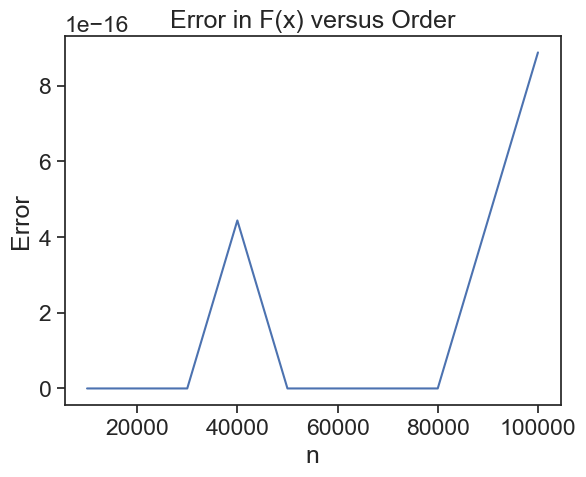

In [32]:
fValues = np.absolute(fValues-TRUE_G)
plt.plot(xValues, fValues)
plt.xlabel('n')
plt.ylabel('Error')
plt.title("Error in F(x) versus Order")
plt.show();

### Difference between Equadratures Weights and Asymptotic Implementation

In [33]:
points100Asy, weights100Asy, v100, t100 = asy(100, 2);
points500Asy, weights500Asy, v500, t500 = asy(500,2);
points1000Asy, weights1000Asy, v1000, t1000 = asy(1000,2);
print(weights100Asy.sum())

basis = eq.Basis('univariate');
param1 = eq.Parameter(lower=-1, upper=1, order=99, distribution='uniform');
param2 = eq.Parameter(lower=-1, upper=1, order=499, distribution='uniform');
param3 = eq.Parameter(lower=-1, upper=1, order=999, distribution='uniform');
poly1 = eq.Poly(param1, basis, method='numerical-integration')
poly2 = eq.Poly(param2, basis, method='numerical-integration')
poly3 = eq.Poly(param3, basis, method='numerical-integration')

points100Eq, weights100Eq = poly1.get_points_and_weights();
points500Eq, weights500Eq = poly2.get_points_and_weights();
points1000Eq, weights1000Eq = poly3.get_points_and_weights();

2.0000018431195183


In [34]:
diff1 = np.absolute((weights100Asy/2)-weights100Eq);
diff2 = np.absolute((weights500Asy/2)-weights500Eq);
diff3 = np.absolute((weights1000Asy/2)-weights1000Eq);

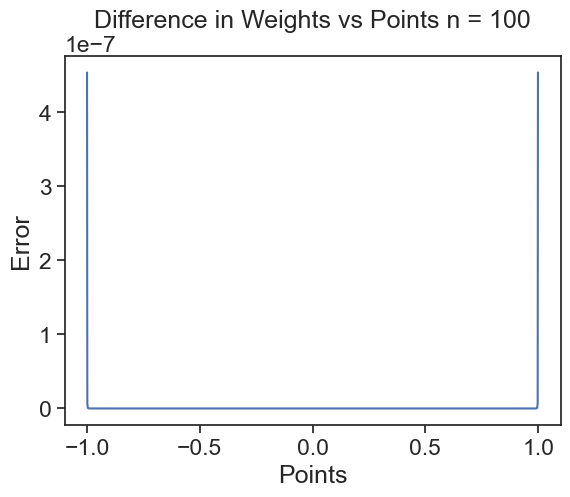

In [35]:
plt.plot(points100Asy, diff1)
# plt.plot(points100Eq, weights100Eq, label='Equadratures')
plt.xlabel('Points');
plt.ylabel('Error');
plt.title('Difference in Weights vs Points n = 100')
# plt.legend()
plt.show()

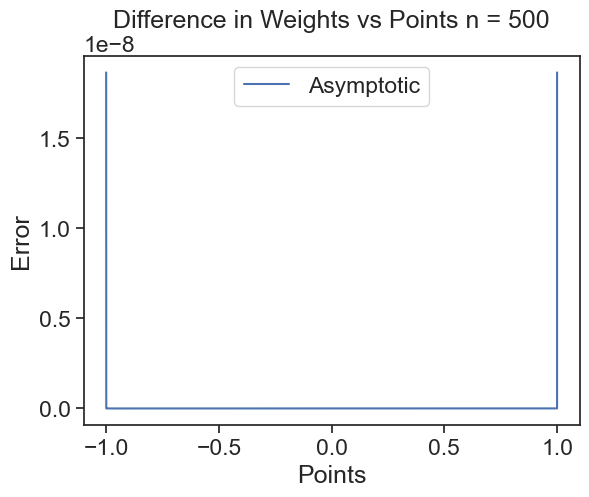

In [36]:
plt.plot(points500Asy, diff2, label='Asymptotic')
# plt.plot(points500Eq, weights500Eq, label='Equadratures')
plt.xlabel('Points');
plt.ylabel('Error');
plt.title('Difference in Weights vs Points n = 500')
plt.legend()
plt.show()

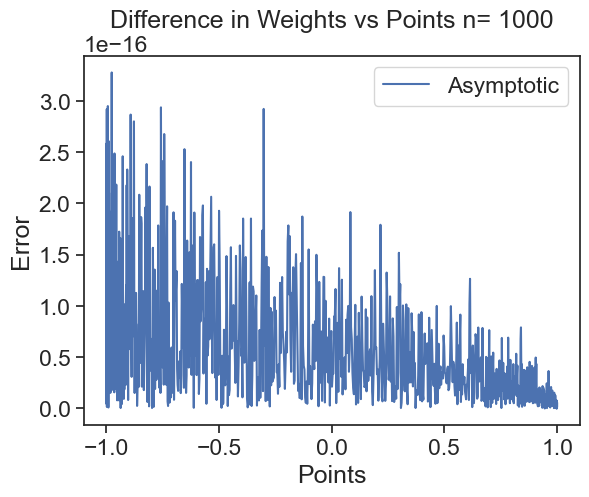

In [37]:
plt.plot(points1000Asy, diff3, label='Asymptotic')
# plt.plot(points1000Eq, weights1000Eq, label='Equadratures')
plt.xlabel('Points');
plt.ylabel('Error');
plt.title('Difference in Weights vs Points n= 1000')
plt.legend()
plt.show()

### Difference in Points between Equadratures and Asymptotic Implementation

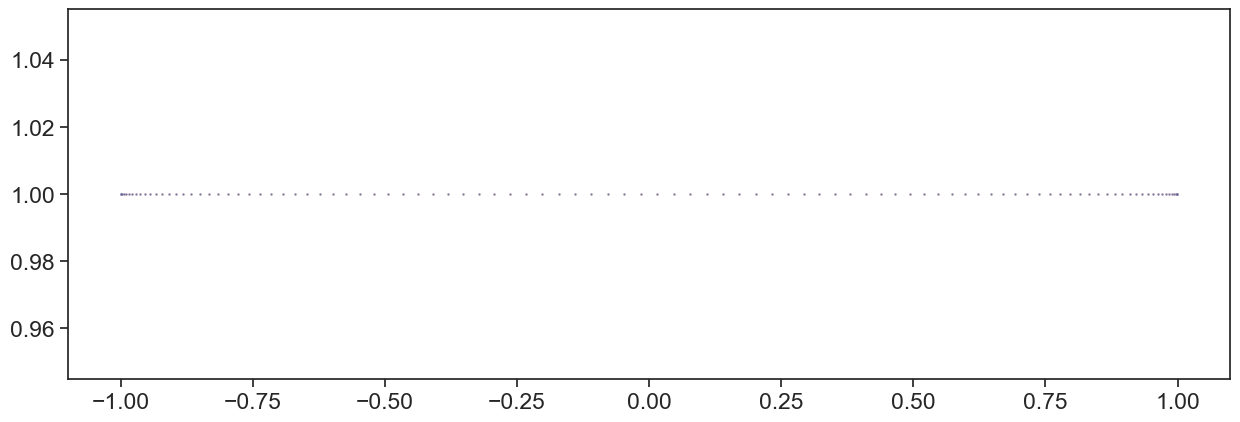

In [38]:
y1 = np.ones(100)
plt.figure().set_figwidth(15)
plt.scatter(points100Asy, y1, s= 0.5, alpha=0.5,color='r')
plt.scatter(points100Eq, y1, s= 0.5, alpha=0.5,color='b')
plt.show()

Not very useful as it stands, but it looks like you can see some differences towards the edges.

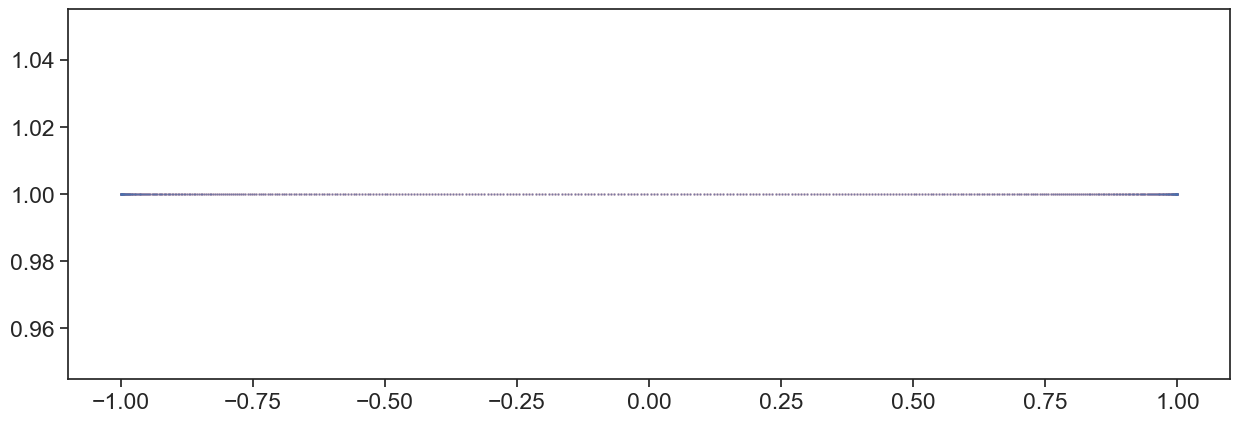

In [39]:
y2 = np.ones(500)
plt.figure().set_figwidth(15)
plt.scatter(points500Asy, y2, s= 0.5, alpha=0.5,color='r')
plt.scatter(points500Eq, y2, s= 0.5, alpha=0.5,color='b')
plt.show()

Little more different but it gets too clumped, lets see if we can zoom in on n=1000

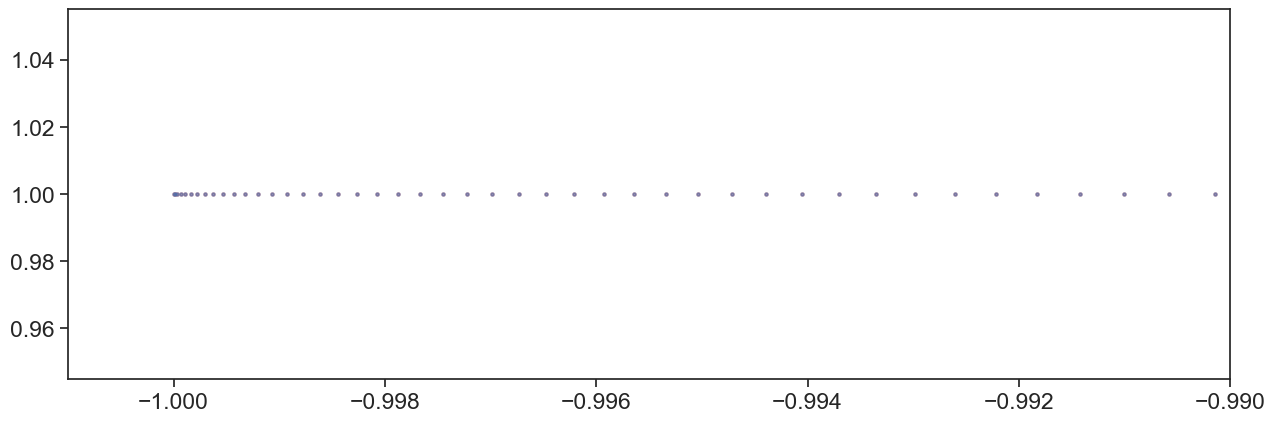

In [40]:
y3 = np.ones(1000)
plt.figure().set_figwidth(15)
plt.scatter(points1000Asy, y3, s= 5, alpha=0.5,color='r')
plt.scatter(points1000Eq, y3, s= 5, alpha=0.5,color='b')
plt.xlim(-1.001,-0.99)
plt.show()

Not that useful still, even when further zoomed in, error in points probably only actually occurs once n is increased further.